<a href="https://colab.research.google.com/github/jserra22/Proyecto-Data-Science-I/blob/main/ProyectoParteIII%2BSerra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Análisis de factores demográficos en la supervivencia de los pasajeros del Titanic*

Hipótesis principal:

> La probabilidad de supervivencia en el Titanic estuvo significativamente influenciada por factores demográficos, especialmente la edad y el género, reflejando decisiones de evacuación y normas sociales de la época (como la priorización de “mujeres y niños primero”).

Este trabajo tiene como objetivo explorar de manera gráfica los factores demográficos que podrían haber influido en la probabilidad de supervivencia de los pasajeros del Titanic. Las siguientes preguntas de investigación guían el análisis, estructurando el enfoque y permitiendo evaluar la hipótesis planteada.

1. Distribución de edades

¿Cómo se distribuyen las edades de los pasajeros a bordo del Titanic y qué patrones demográficos se pueden identificar en la población total?
Esta pregunta busca caracterizar la composición etaria de los pasajeros para contextualizar los análisis posteriores y determinar si ciertos grupos de edad estaban más representados.

2. Relación entre edad y supervivencia

¿Hay una relación observable entre el grupo etario de un pasajero y su probabilidad de supervivencia?
Se analiza si la edad —categorizada en rangos significativos como niños, adolescentes, adultos jóvenes, adultos y mayores— tuvo un impacto directo en las probabilidades de sobrevivir al naufragio.

3. Género y supervivencia

¿Influye el género del pasajero en la tasa de supervivencia?
Esta dimensión examina si existieron diferencias notables entre hombres y mujeres, con el objetivo de aislar el efecto del género sobre la supervivencia.

4. Interacción entre edad y género

¿Cómo interactúan el género y el grupo etario para influir conjuntamente en la supervivencia?
Se explora si las diferencias observadas dentro de cada género varían según la edad, o si ciertos subgrupos (por ejemplo, mujeres adultas o niños varones) presentan patrones particulares.

5. Influencia de las decisiones de evacuación y normas sociales

¿Se puede identificar un patrón consistente que sugiera que las decisiones de evacuación o las normas sociales de la época influyeron en la asignación de oportunidades de supervivencia?
Esta pregunta busca determinar si factores externos, como decisiones de tripulación o normas sociales (ej. "mujeres y niños primero"), afectaron los resultados observados.

In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Coderhouse/Data_Science/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coderhouse/Data_Science


In [29]:
plt.style.use('petroff10')

In [30]:
df_titanic = pd.read_csv('Titanic-Dataset.csv')

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


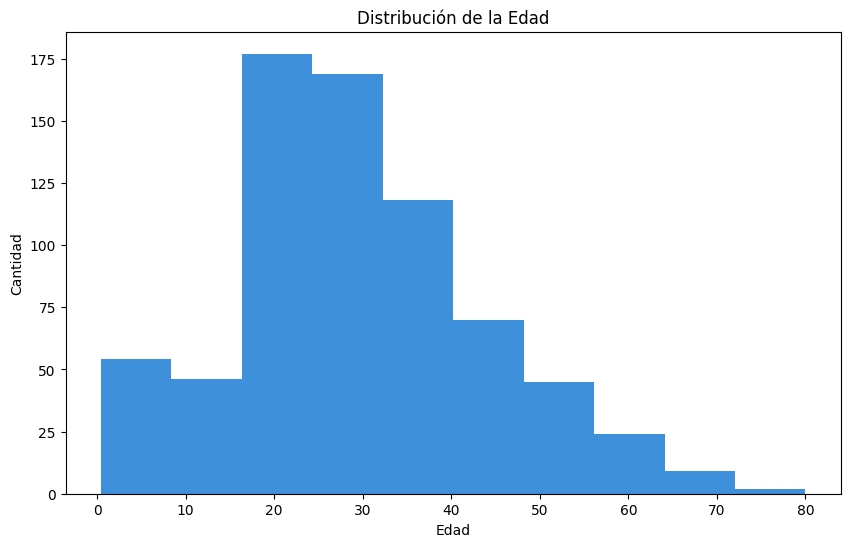

In [31]:
plt.figure(figsize=(10,6))
plt.hist(df_titanic['Age'])
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de la Edad')
plt.show()

In [32]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Niño', 'Adolescente', 'Joven Adulto', 'Adulto', 'Mayor']

df_titanic['Grupo_Etario'] = pd.cut(df_titanic['Age'], bins=bins, labels=labels, include_lowest=True)


/tmp/ipython-input-1631152972.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  supervivencia_grupo = df_titanic.groupby('Grupo_Etario')['Survived'].mean()


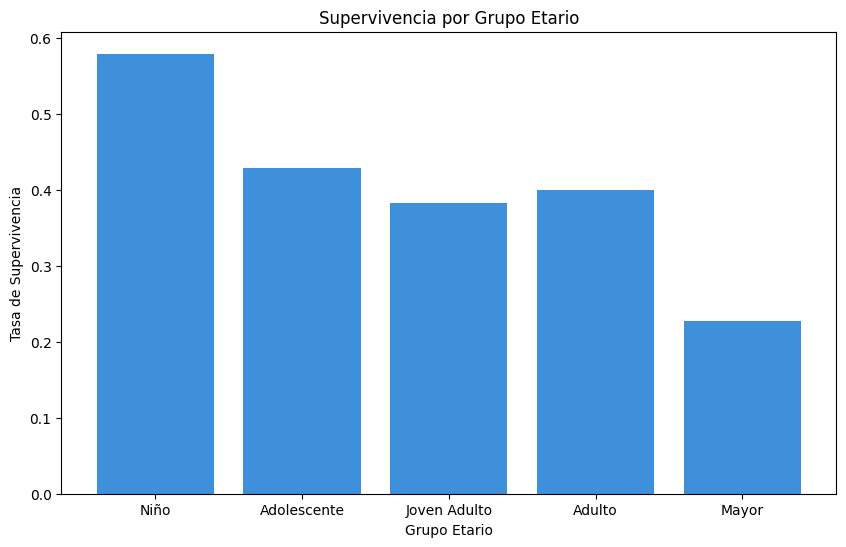

In [33]:
supervivencia_grupo = df_titanic.groupby('Grupo_Etario')['Survived'].mean()

plt.figure(figsize=(10,6))
plt.bar(supervivencia_grupo.index, supervivencia_grupo.values)
plt.xlabel('Grupo Etario')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia por Grupo Etario')
plt.show()

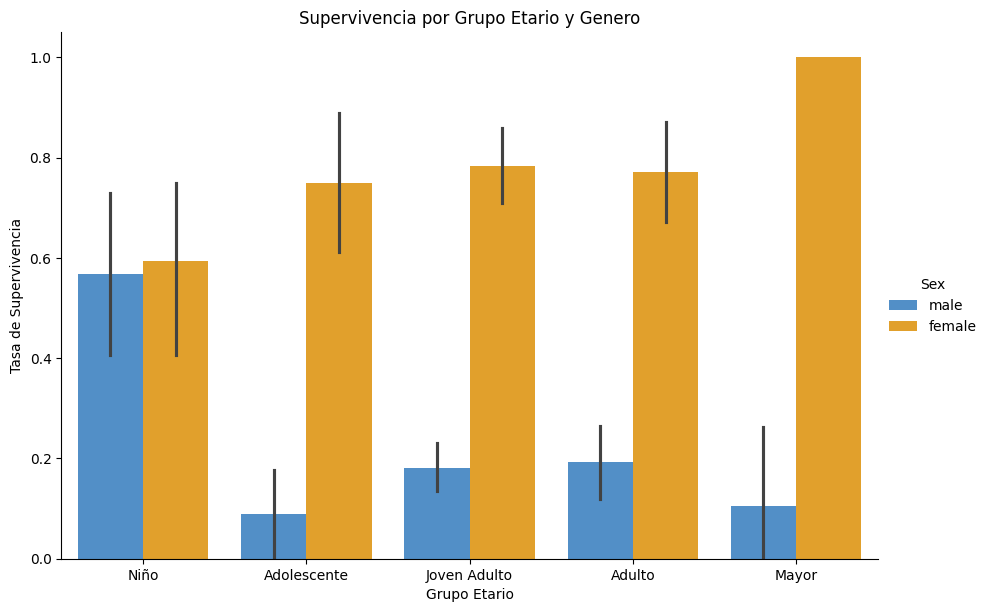

In [34]:
sns.catplot(
    data=df_titanic,
    kind='bar',
    x='Grupo_Etario',
    y='Survived',
    hue='Sex',
    height=6,
    aspect=1.5
)
plt.xlabel('Grupo Etario')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia por Grupo Etario y Genero')
plt.show()

In [35]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())
df_titanic['Fare'] = df_titanic['Fare'].fillna(df_titanic['Fare'].median())

le = LabelEncoder()
df_titanic['Sex'] = le.fit_transform(df_titanic['Sex'])

features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

X = df_titanic[features]
y = df_titanic[target]

print("Características seleccionadas:", features)
display(X.head())

Características seleccionadas: ['Pclass', 'Sex', 'Age', 'Fare']


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

modelo.fit(X_train, y_train)

print("¡Modelo de clasificación entrenado exitosamente!")

¡Modelo de clasificación entrenado exitosamente!


Exactitud del modelo: 0.8100558659217877

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



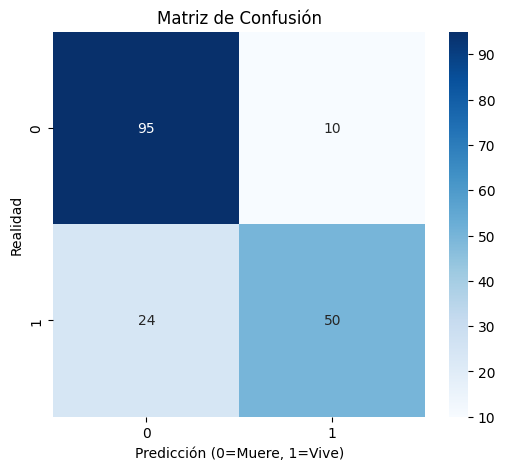

In [37]:
y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
matriz = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción (0=Muere, 1=Vive)')
plt.ylabel('Realidad')
plt.show()

# *Conclusiones*

1.   **Validación del Modelo**: El modelo de Random Forest alcanzó una exactitud del **81%**. Esto nos indica que es posible predecir la tasa de supervivencia de una forma fehaciente con tan solo 4 variables: Clase, Género, Edad y Tarifa.

2.   **Confirmación de Hipótesis**: El uso de las variables Género y Edad confirma que, estadísticamente, la norma social de "mujeres y niños primero" a la hora de evacuar la nave fue un factor determinante para la supervivencia de estos grupos.

3.   **Dimensión Socioeconómica de la hipótesis**: Las variables de Clase y Tarifa mostraron que los pasajeros con mayor poder adquisitivo tuvieron un acceso privilegiado a los botes salvavidas, actuando como un segundo filtro de supervivencia después del género.